In [62]:
import tensorflow as tf

tf.__version__

'2.19.0'

In [63]:
# setup ur data
X = tf.range(-100, 100, 4)
y = X+10
len(X), len(y)

(50, 50)

In [64]:
# split the data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

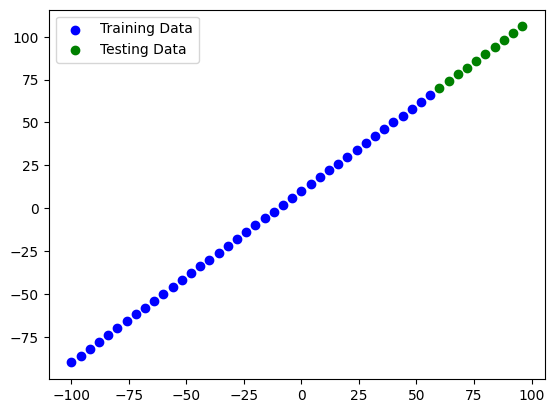

In [65]:
## Visulaize
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [66]:
## creat ethe model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="Input_Layer"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name="Output_Layer")

], name="Regression_Model")

loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])

model.fit(X_train, y_train, epochs=50)


Epoch 1/50


/Users/sachinmurali/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.7192 - mae: 37.7192  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.8706 - mae: 23.8706
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0670 - mae: 10.0670
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7529 - mae: 10.7529
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1221 - mae: 13.1221
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1566 - mae: 13.1566
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8627 - mae: 11.8627
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2994 - mae: 9.2994
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2080 - mae: 8.2080
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5618 - mae: 10.5618
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8609 - mae: 9.8609  
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8105 - mae: 7.8105
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2769 

In [67]:
model.summary()

Model: "Regression_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

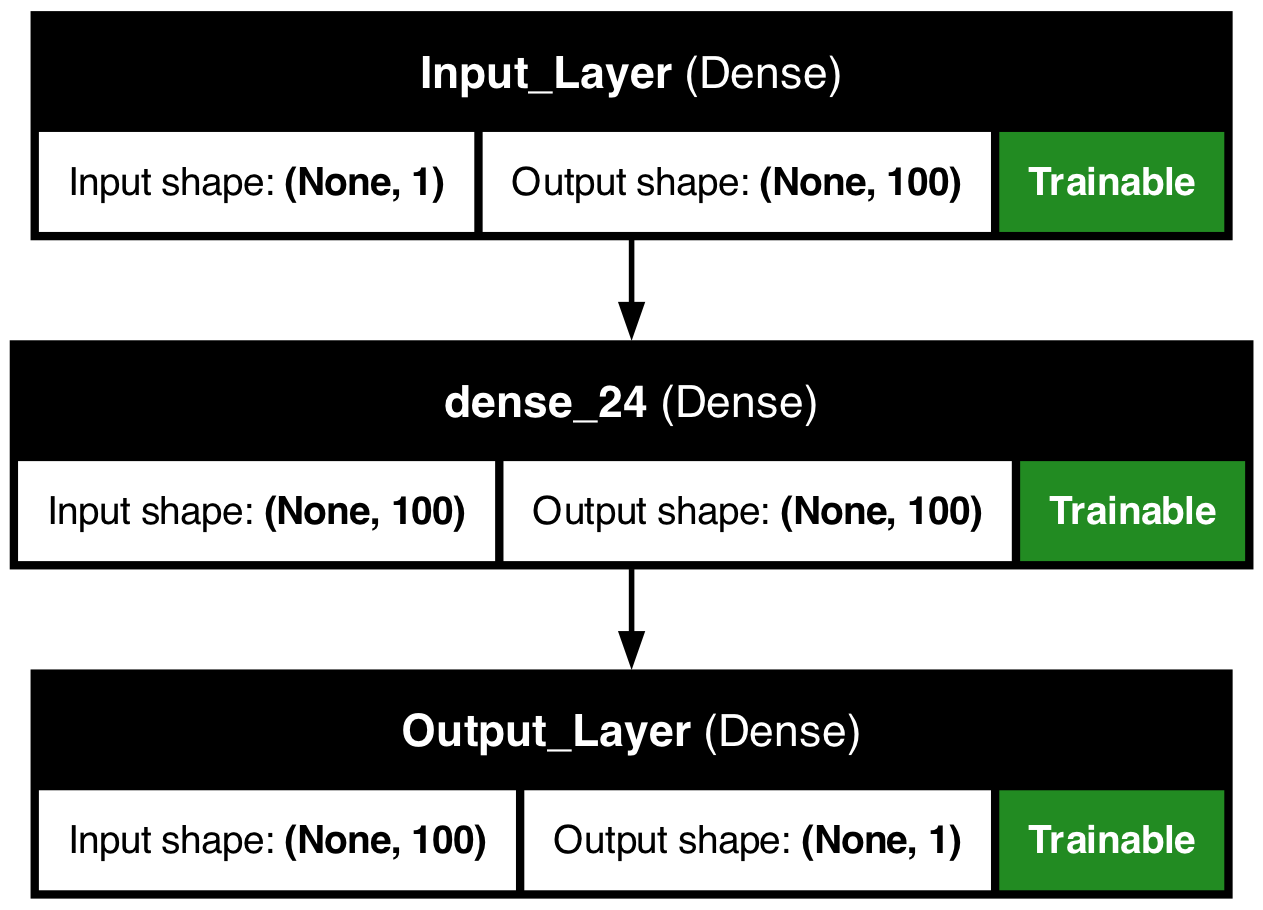

In [68]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, show_trainable=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


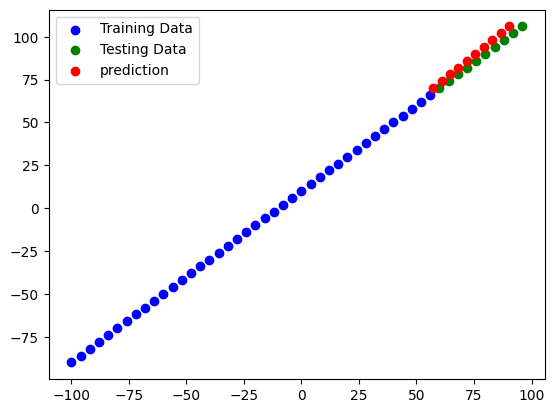

In [69]:
# visualize our model predition
## Visulaize
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter((X_test), y_test, c="g", label="Testing Data")
plt.scatter(model.predict(X_test),y_test, c="r" ,label= "prediction")
plt.legend()

In [70]:
# evaluate the model

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.2512 - mae: 14.2512


[14.251199722290039, 14.251199722290039]

In [71]:
import matplotlib.pyplot as plt

def plot_predition(X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test,
                   model = model):
    ''' visualize our model predition '''
    
    plt.scatter(X_train, y_train, c="b", label="Training Data")
    plt.scatter((X_test), y_test, c="g", label="Testing Data")
    plt.scatter(model.predict(X_test),y_test, c="r" ,label= "prediction")
    plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


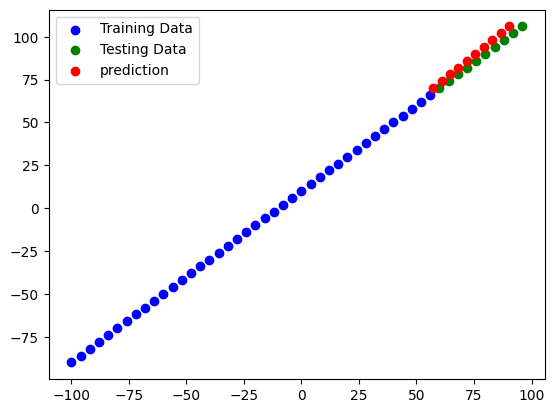

In [72]:
plot_predition()

In [73]:
# Build thye model 1
import tensorflow as tf


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])



loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model_1.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])
model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.0556 - mae: 24.0556 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3244 - mae: 21.3244
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5758 - mae: 17.5758
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8976 - mae: 14.8976
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9793 - mae: 11.9793
Epoch 6/100


/Users/sachinmurali/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7262 - mae: 9.7262
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0224 - mae: 8.0224
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6087 - mae: 7.6087
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5268 - mae: 7.5268
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5712 - mae: 7.5712
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7582 - mae: 7.7582
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6268 - mae: 7.6268
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6367 - mae: 7.6367
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6634 - mae: 7.6634
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7489 - mae: 7.7489
Epoch 16/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8751 - mae: 7.8751
Epoch 17/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6935 - mae: 7.6935
Epoch 18/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7131 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


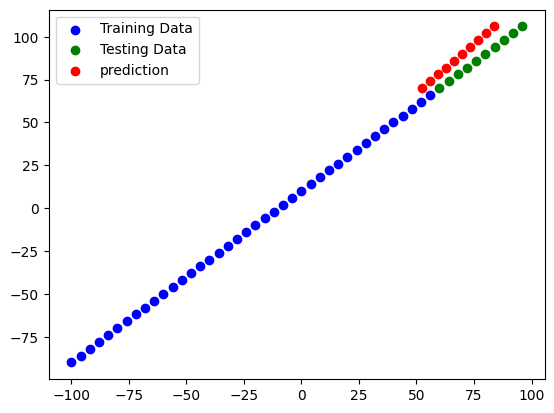

In [74]:
plot_predition(model=model_1)

In [75]:

loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.5487 - mae: 36.5487  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2670 - mae: 23.2670
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.3992 - mae: 11.3992
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0033 - mae: 8.0033
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8212 - mae: 7.8212
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8144 - mae: 8.8144
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6375 - mae: 9.6375  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5433 - mae: 8.5433
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6935 - mae: 9.6935
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9538 - mae: 7.9538
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5760 - mae: 9.5760  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8269 - mae: 7.8269
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


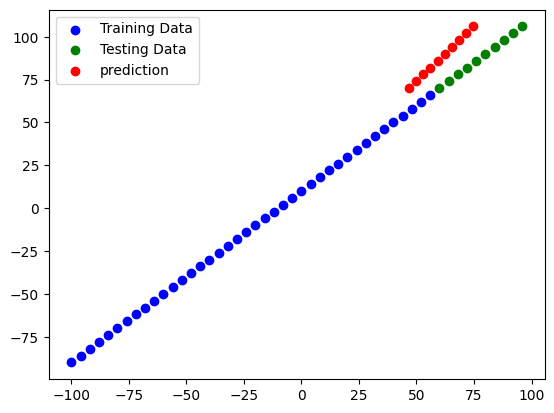

In [76]:
plot_predition(model=model_2)

In [77]:
loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape=[1]),
     tf.keras.layers.Dense(1)
])
model_3.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.7225 - mae: 29.7225  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8390 - mae: 14.8390
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2844 - mae: 7.2844
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7768 - mae: 8.7768
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1279 - mae: 8.1279
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.0604 - mae: 9.0604
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8422 - mae: 10.8422
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8312 - mae: 8.8312
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3708 - mae: 8.3708
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3106 - mae: 10.3106
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8580 - mae: 7.8580
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7293 - mae: 7.7293
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


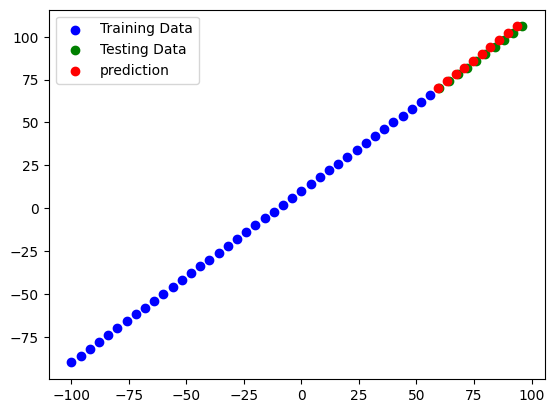

In [78]:

plot_predition(model=model_3)

In [79]:
model_3.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [91]:
# saving our model

model_3.export("modelzzz")

INFO:tensorflow:Assets written to: modelzzz/assets


INFO:tensorflow:Assets written to: modelzzz/assets


Saved artifact at 'modelzzz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_57')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  5760086288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5760087056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5760086096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5760087440: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [90]:
tf.keras.__version__

'3.9.2'

In [97]:
reload_m3 = tf.keras.models.load_model("model_3.h5")

In [98]:
reload_m3.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [100]:
reload_m3.evaluate(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1728 - mean_absolute_error: 6.1728


[6.44364070892334, 6.44364070892334]

In [103]:
h5_model = tf.keras.models.load_model("model_3.h5")

h5_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)